# Video: Visualizing Linear Quadratic Regulators

Linear quadratic regulators are designed to converge to a set point and and maintain that state to minimize cost.
This video will show how the linear transformations from optimal action selection lead to a clear visualization of that convergence.

Script:
* Linear quadratic regulators are based on linear dynamics and pick optimal actions with a linear transformation matrix.
* Let's take a look at how those linear choices result in linear changes to the states.

## Infinite Horizon Linear Quadratic Regulator Problems

\begin{array}{rl}
\text{Given} & \mathbf{x}_0, \mathbf{A}, \mathbf{B}, \mathbf{Q}, \mathbf{R} \\
& \text{where}~\mathbf{Q}, \mathbf{R}~\text{are positive semidefinite,} \\
\text{minimize}_{\mathbf{u}_t} & \mathbb{E}\left[ \sum_t \left( \frac{1}{2} \mathbf{x}_t^\mathrm{T} \mathbf{Q} \mathbf{x}_t + \frac{1}{2}  \mathbf{u}_t^\mathrm{T} \mathbf{R} \mathbf{u}_t \right) \right] \\
\text{subject to} & \mathbf{x}_{t+1} = \mathbf{A} \mathbf{x}_t + \mathbf{B} \mathbf{u}_t + \epsilon_t~\text{for}~t=0,\ldots,n-1 \\
& \text{and}~\mathbb{E}[\epsilon_t] = 0~\text{for}~t=0,\ldots,n-1\\
\end{array}

Script:
* Here is the specification for a discrete linear quadratic regulator problem with an infinite horizon.
* For this analysis, an infinite horizon is convenient so the dynamics are fixed instead of changing each time step.

## Optimal Solutions to Linear Quadratic Regulator Problems

The optimal solution to a linear quadratic regulator problems takes the following form.

\begin{array}{rcl}
\mathbf{u}_t & = & -\mathbf{K} \mathbf{x}_t \\
\end{array}

This leads to the following optimal update rule.

\begin{array}{rcl}
\mathbf{x}_{t+1} & = & \mathbf{A}_t \mathbf{x}_t + -\mathbf{B}_t \mathbf{K} \mathbf{x}_t + \epsilon_t \\
& = & ( \mathbf{A} - \mathbf{B} \mathbf{K}) \mathbf{x}_t + \epsilon_t \\
\end{array}

So $(\mathbf{A} - \mathbf{B} \mathbf{K})$ is a transformation iterating in the state space with some noice from $\epsilon_t$.

Script:
* A basic fact about linear quadratic regulator problems is that the optimal actions are always a linear transformation of the current state.
* The hard part is calculating that transformation which we denote as K here.
* This gives us an update rule for our state vector x that is linear with a noise term added.
* With a little algebra, we can rewrite that as one linear transform of x using the matrix A minus BK, plus the noise again.
* Let's apply this to a more concrete problem.

## Dynamics of a Quadcopter Problem

\begin{array}{rcl}
A & = & \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \\
B & = & \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\
Q & = & \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix} \\
R & = & \begin{bmatrix} 1 \end{bmatrix}
\end{array}

Script:
* Here are the matrices of a simple one dimensional quadcopter control problem.


In [ ]:
%pip install -q control

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import control

Script:
* I will use the Python control library to solve for K so we can compute the optimal actions.

In [ ]:
A = np.array([[1, 1], [0, 1]])
B = np.array([[0], [1]])
Q = np.array([[1, 0], [0, 0]])
R = np.array([[1]])

K, _, _ = control.dlqr(A, B, Q, R)
K

array([[0.48053382, 1.24962107]])

Script:
* That is the array K that we want for optimal action selection.

In [ ]:
T = (A - B @ K)
T

array([[ 1.        ,  1.        ],
       [-0.48053382, -0.24962107]])

Script:
* This matrix T is the linear component of the state updates.
* Let's see what happens if we repeatedly transform with T and ignore the noise.

## Visualizing State Changes


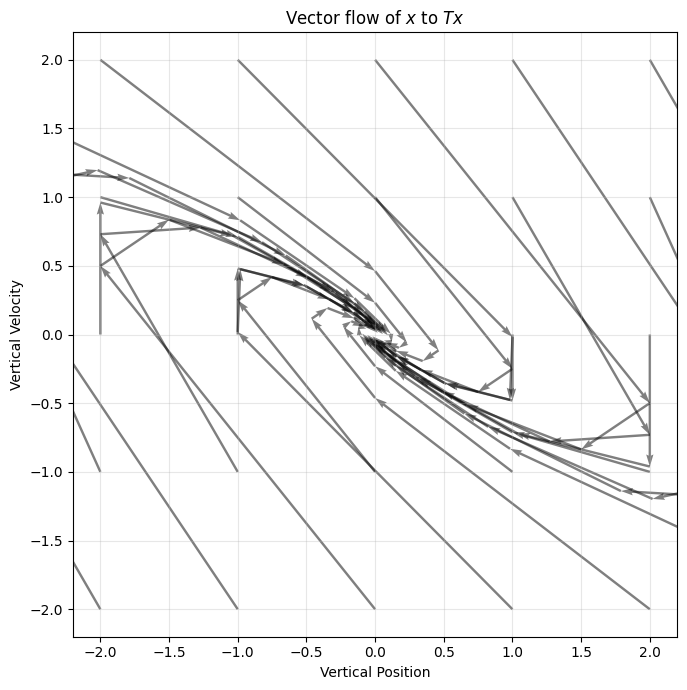

In [ ]:
# based on https://chatgpt.com/share/689be7f8-b8c4-800c-a773-02dcf4c6d512

X0 = []
X1 = []

for x0 in np.linspace(-2, 2, 5):
    for x1 in np.linspace(-2, 2, 5):
        # preserve x0, x1 while iterating
        (z0, z1) = (x0, x1)
        while np.linalg.norm([z0, z1]) >= 0.1:
            X0.append(z0)
            X1.append(z1)
            (z0, z1) = T @ np.array([[z0], [z1]]).ravel()
X0 = np.array(X0)
X1 = np.array(X1)

pts = np.stack([X0.ravel(), X1.ravel()], axis=1)  # shape (N,2)

# --- apply transformation ---
Tx = (T @ pts.T).T              # shape (N,2)
d = Tx - pts                    # displacement vectors

# --- plot ---
fig, ax = plt.subplots(figsize=(7, 7))

# arrows from x to Tx
ax.quiver(
    pts[:, 0], pts[:, 1],       # starts at x
    d[:, 0], d[:, 1],           # points toward Tx
    angles='xy', scale_units='xy', scale=1.0, width=0.004, alpha=0.5
)

# cosmetics
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)
ax.set_xlabel('Vertical Position')
ax.set_ylabel('Vertical Velocity')
ax.set_title('Vector flow of $x$ to $T x$')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Script:
* Ignoring noise, the state vector follows a spiral path around the set point at the zero vector.
* Noise will disrupt this pattern and might stall convergence once it gets close to the set point, but the noise won't stop a far off state from getting close.
* With this visualization in mind, you can think of linear quadratic regulators as finding the lowest cost path towards the set point based on the linear dynamics and cost function.
* And for any solvable system, that will always look similar to this spiral pattern.

Script: (faculty on screen)
* Linear quadratic regulators are an elegant solution to many physical control problems, and they have some neat math governing how they stabilize a system.